In [26]:
import random

def maj(x, y, z):
    return (x & y) ^ (y & z) ^ (z & x)

def ch(x, y, z):
    return (x & y) ^ (not x & z)

def KSG128(state):
    return state[12] ^ state[154] ^ maj(state[235], state[61], state[193])

def FBK128(state, ca, cb):
    ks = KSG128(state)
    return (state[0] ^ (not state[107]) ^ 
            maj(state[244], state[23], state[160]) ^ 
            ch(state[230], state[111], state[ 66]) ^
            (ca & state[196]) ^
            (cb & ks))

def StateUpdate128(state, m, ca, cb):
    f = FBK128(state, ca, cb)
    state.append(f ^ m)
    state[289] = state[289] ^ state[235] ^ state[230]
    state[230] = state[230] ^ state[196] ^ state[193]
    state[193] = state[193] ^ state[160] ^ state[154]
    state[154] = state[154] ^ state[111] ^ state[107]
    state[107] = state[107] ^ state[ 66] ^ state[ 61]
    state[ 61] = state[ 61] ^ state[ 23] ^ state[  0]
    state.pop(0)    
    return state

def StateInit(key, iv):
    msg = ([key[i] for i in range(128)] + 
           [iv[ i] for i in range(128)] + 
           [1] +
           [0 for i in range(1536-256-1)])
        
    state = [0 for i in range(292)]
    states = []
    ca = 1
    cb = 1        
    for i in range(1536):
        state = StateUpdate128(state, msg.pop(0), ca, cb)
        states.append(list(state))
    return state, states

def AssociatedData(state, ad, states):
    msg = (ad +
           [1] +
           [0 for i in range(512-len(ad)-1)])
        
    ca = 1
    cb = 1        
    for i in range(255):
        state = StateUpdate128(state, msg.pop(0), ca, cb)
        states.append(list(state))
    ca = 0
    cb = 1        
    for i in range(255):
        state = StateUpdate128(state, msg.pop(0), ca, cb)
        states.append(list(state))
    return state, states

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def draw2DArray(array2D):    
    plt.figure(figsize=(40,40))
    imgplot = plt.imshow(array2D, interpolation="nearest", aspect='auto')
    imgplot.set_cmap('binary')
    print(imgplot.get_size()) #(figsize=(6, 3.2))

    return imgplot

(1536, 292)


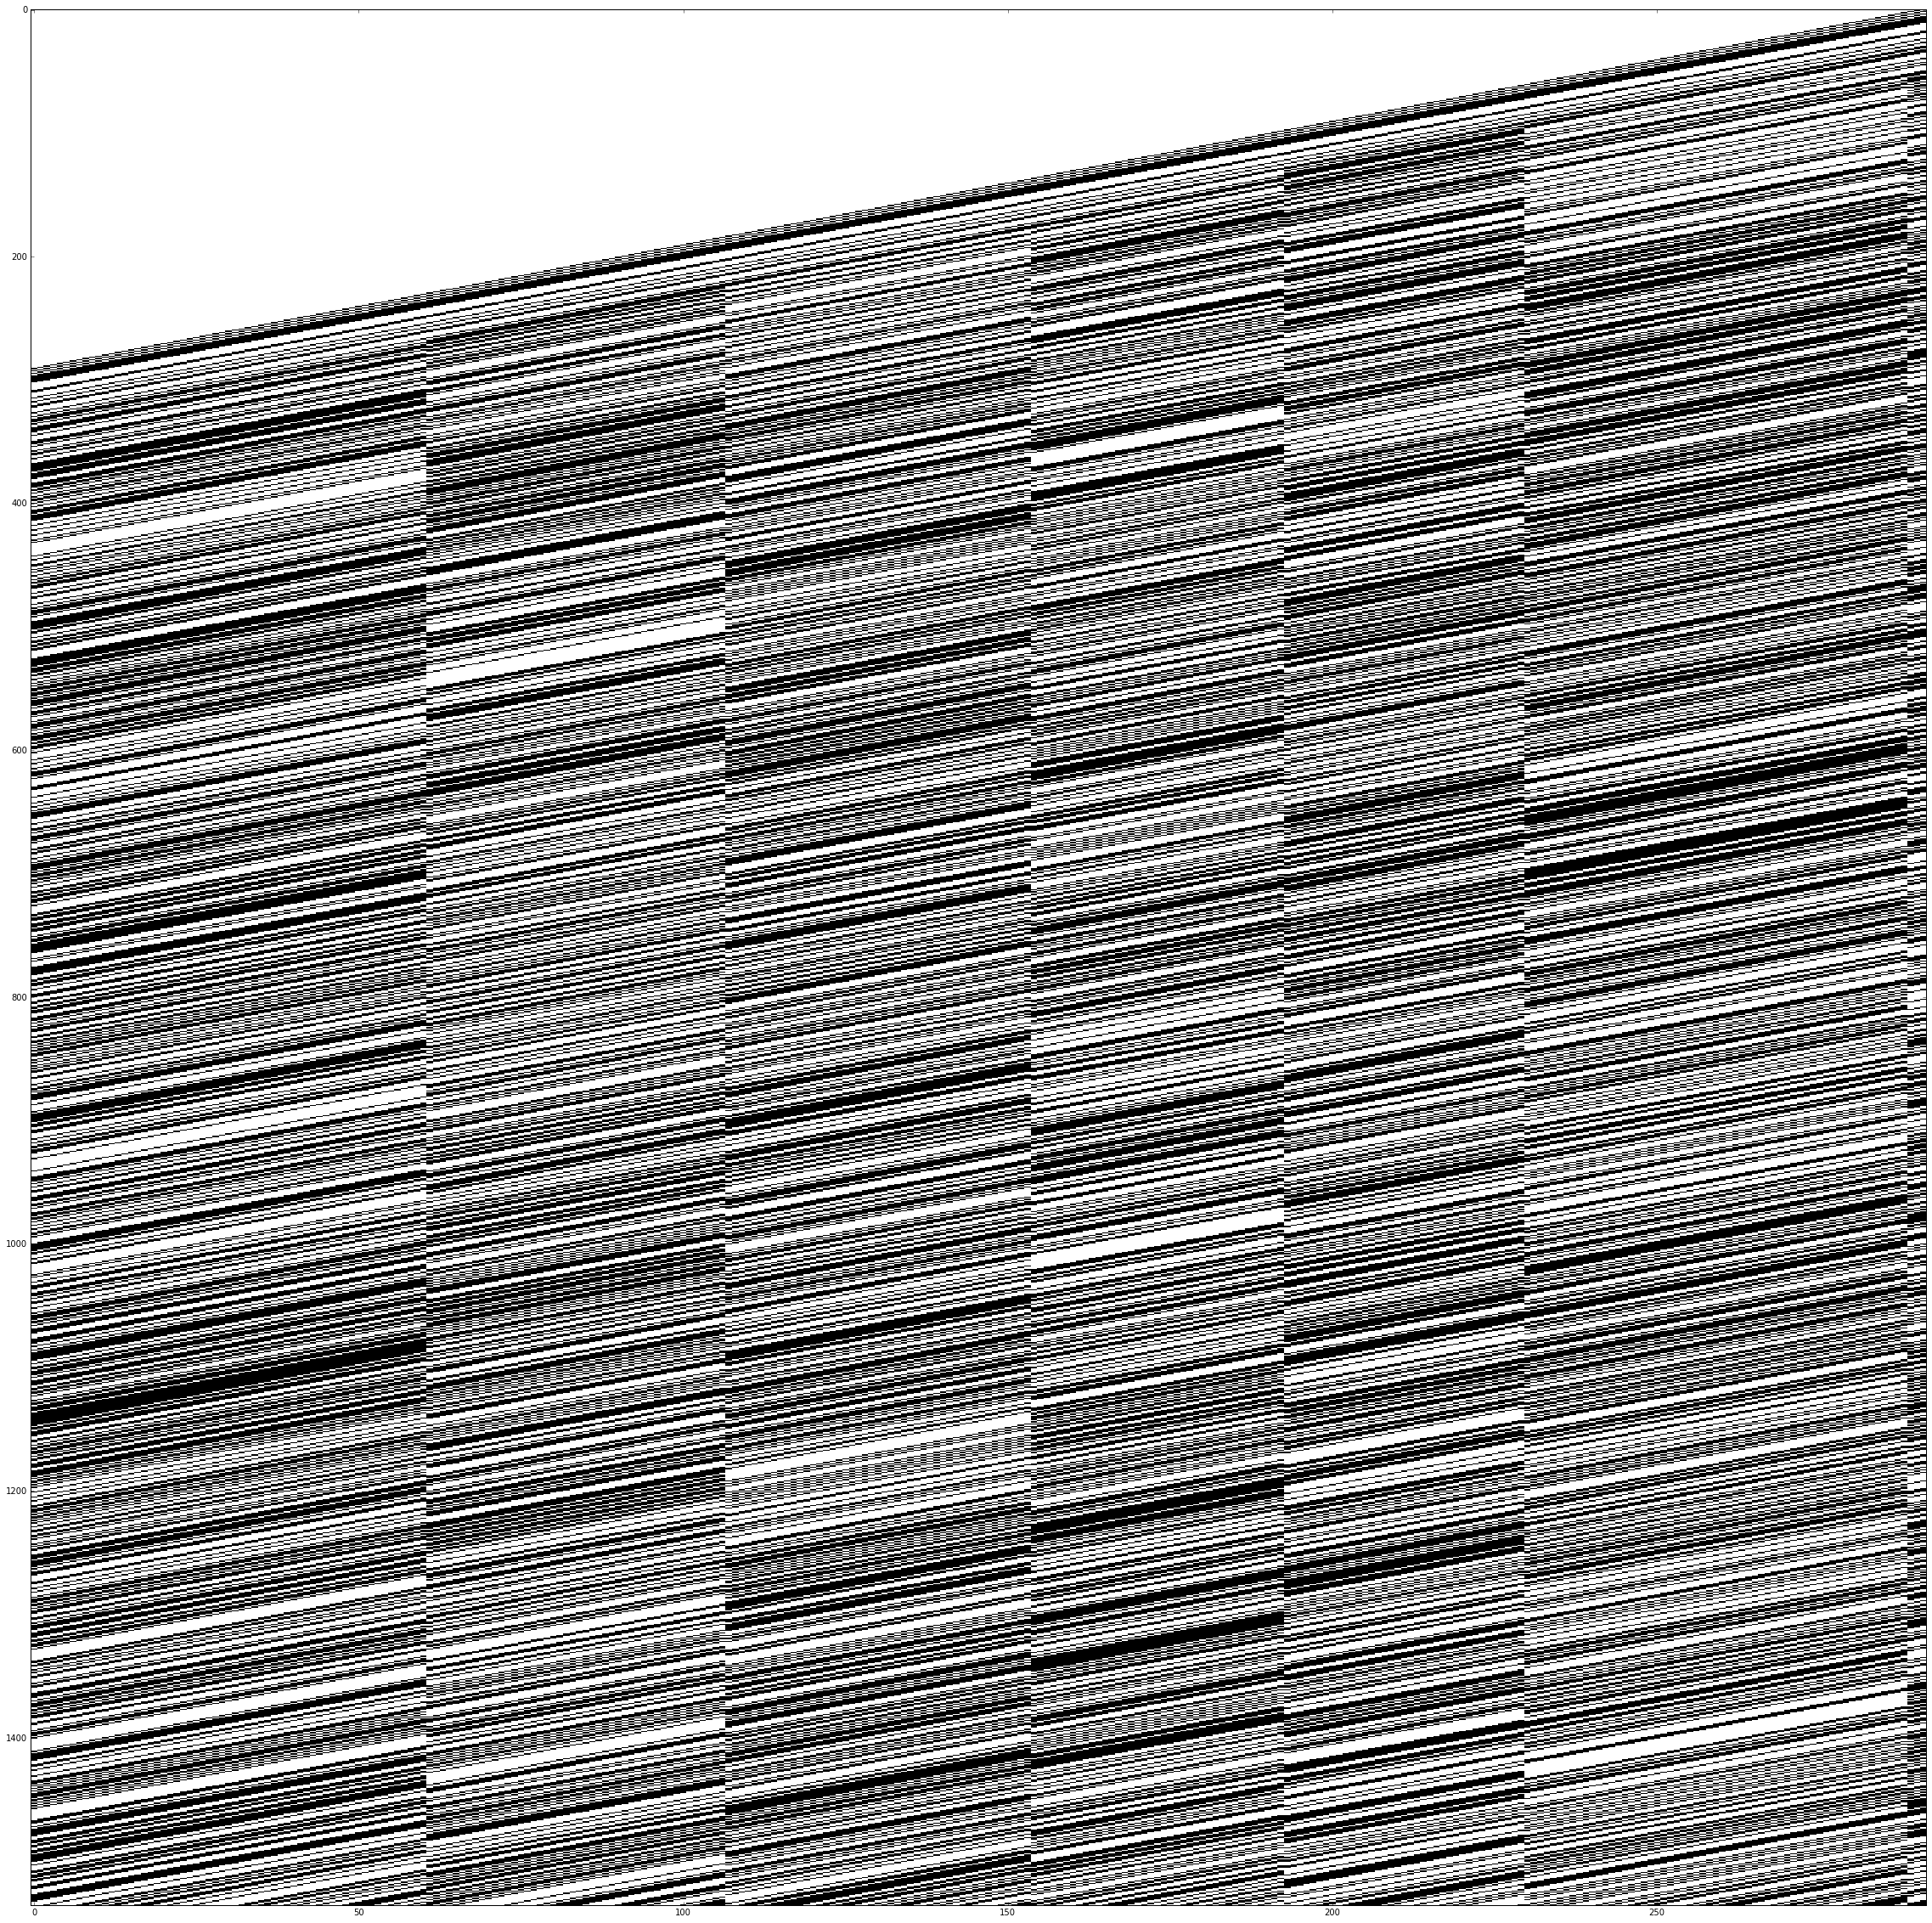

In [48]:
key128 = [random.getrandbits(1) for i in range(128)]
iv128  = [random.getrandbits(1) for i in range(128)]
msg    = [0 for i in range(128)]

state, states = StateInit(key128, iv128)
draw2DArray(states)